In [17]:
import nbsetup as nb
import pickle
import copy
import seaborn as sns
import pandas as pd
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt

In [14]:
with open("../../datasets/daisy_adjusted.pickle", 'rb') as fh:
    scan = pickle.load(fh)

In [15]:
obs_plants = np.array([w[1] for w in scan.values()])

In [18]:
plants = []
for i, p in enumerate(obs_plants):
    plants.append(ep.Discrete(p, (0,1,2,3)))
    nb.cp(i)

200


In [61]:
data = []
x = list(scan.keys())
for i in range(12,20):
    for j, p in enumerate(plants):
        d = ep.Discrete(p.observations[:i], (0,1,2,3), metrics=('incoherence',)).comparison()
        d['ensembles'] = i
        d['x'] = x[j]
        data.append(d)

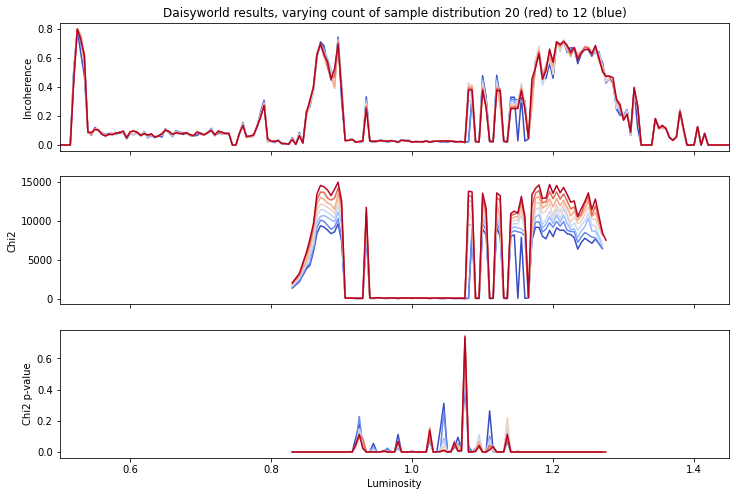

In [65]:
data = pd.DataFrame(data)
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12,8))
pal = 'coolwarm'
t = sns.lineplot(data=data, x='x', y='incoherence', hue='ensembles', ax=axes[0], palette=pal, legend=None)
t.set(ylabel='Incoherence', title='Daisyworld results, varying count of sample distribution 20 (red) to 12 (blue)')
g = sns.lineplot(data=data, x='x', y='chi2', hue='ensembles', ax=axes[1], palette=pal, legend=None)
g.set(ylabel='Chi2')
g = sns.lineplot(data=data, x='x', y='chi2 p', hue='ensembles', ax=axes[2], palette=pal, legend=None)
g.set(xlim=(0.50, 1.45), ylabel='Chi2 p-value', xlabel='Luminosity')
g.get_figure().savefig('figures/chi2.eps')

In [ ]:
def gen_data(incs, x, minus=None, mode='ensembles'):
    data = []
    
    if mode == 'ensembles':
        maximum = incs[0].ensemble_count
    elif mode == 'observations':
        maximum = incs[0].obs_counts['max']
    else:
        raise ValueError('incorrect mode')
    
    for i in minus:
        for j, inc in enumerate(incs):
            if mode == 'ensembles':
                inc.observations = inc.observations[0:maximum-i]
            elif mode == 'observations':
                inc.observations = inc.observations[:, 0:maximum-i]
            
            inc.weights = None
            inc.analyse()
            try:
                chi2, chip, _, _ = inc.chi2()
            except ValueError:
                chi2, chip, _, _ = None, None, None, None
            data.append({
                'chi2': chi2,
                'chi2 p-value': chip,
                'incoherence': inc.incoherence,
                mode: maximum-i,
                'luminosity': x[j],
            })
    return data

In [3]:
incoherences = copy.deepcopy([series.y[-1] for series in scan.y])
data = pd.DataFrame(gen_data(incoherences, scan.x, range(13)))
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(5,8))
pal = 'coolwarm'
sns.lineplot(data=data, x='luminosity', y='incoherence', hue='ensembles', ax=axes[0], palette=pal, legend=None)
sns.lineplot(data=data, x='luminosity', y='chi2', hue='ensembles', ax=axes[1], palette=pal, legend=None)
g = sns.lineplot(data=data, x='luminosity', y='chi2 p-value', hue='ensembles', ax=axes[2], palette=pal, legend=None)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig.savefig('figures/daisy-ensembles.eps')

NameError: name 'scan' is not defined

In [1]:
incoherences = copy.deepcopy([series.y[-1] for series in scan.y])
data = pd.DataFrame(gen_data(incoherences, scan.x, range(0, 600, 50), mode='observations'))
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12,8))
pal = 'coolwarm'
sns.lineplot(data=data, x='luminosity', y='incoherence', hue='observations', ax=axes[0], palette=pal, legend=None)
sns.lineplot(data=data, x='luminosity', y='chi2', hue='observations', ax=axes[1], palette=pal, legend=None)
g = sns.lineplot(data=data, x='luminosity', y='chi2 p-value', hue='observations', ax=axes[2], palette=pal, legend=None)
g.set(title='Daisyworld results, varying count of sample distribution 20 (red) to 7 (blue)')

NameError: name 'copy' is not defined